<a href="https://colab.research.google.com/github/streakcraze/PRODIGY_ML_03/blob/main/image_classification_using_svm_(without_edge_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prodigy Task-3

## Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

## Dataset: https://www.kaggle.com/c/dogs-vs-cats/data

Note: Make sure to upload the dataset (train.zip and test1.zip) on to your G-drive before running the program and also connect your g-drive with this colab notebook

# 1. Data Acquisition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
shutil.unpack_archive("/content/drive/MyDrive/train.zip")

In [3]:
import os
train_images_list = sorted(os.listdir("train"))
print(f"the train dataset has {len(train_images_list)} images")

the train dataset has 25000 images


In [4]:
import re
cat_images = [x for x in train_images_list if re.match("cat", x)]
dog_images = [x for x in train_images_list if re.match("dog", x)]
print(f"{len(cat_images)} cat images")
print(f"{len(dog_images)} dog images")

12500 cat images
12500 dog images


# 2. Data Preprocessing

In [5]:
import numpy as np
from skimage import io, color, transform
import matplotlib.pyplot as plt
import gc

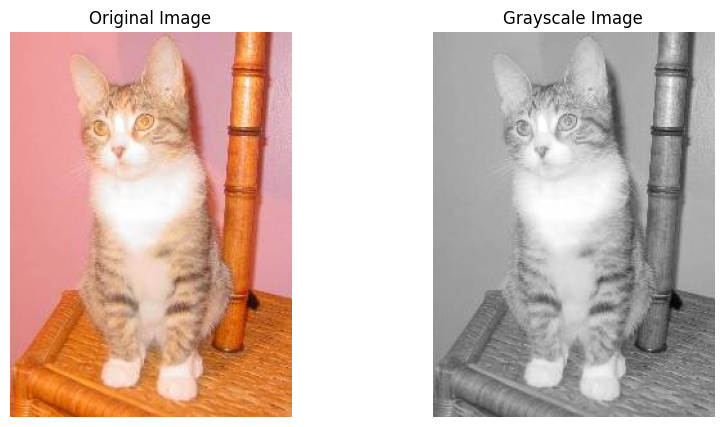

In [6]:
cat_img = io.imread(os.path.join("train", cat_images[12]))
cat_gray = color.rgb2gray(cat_img)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cat_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cat_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

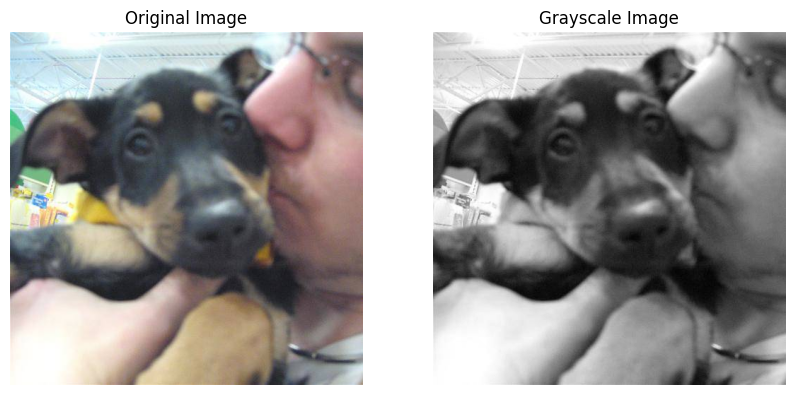

In [7]:
dog_img = io.imread(os.path.join("train", dog_images[1000]))
dog_gray = color.rgb2gray(dog_img)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [8]:
features = np.array([])
# "0" for cat and "1" for dog
labels = np.append(np.full(12500, 0), np.full(12500, 1))

In [9]:
cat_features = []
for img in cat_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join("train", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # resize the image
  resized_img = transform.resize(gray_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  cat_features.append(flat_img)

features = np.vstack(cat_features)

In [10]:
dog_features = []
for img in dog_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join("train", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # resize the image
  resized_img = transform.resize(gray_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  dog_features.append(flat_img)

features = np.append(features, dog_features, axis=0)

In [11]:
from sklearn.decomposition import PCA

In [12]:
print("applying principal component analysis ...")
pca = PCA(n_components=0.9)
pca.fit(features)
principal_features = pca.transform(features)
print(f"features reduced from {len(features[0])} to {len(principal_features[0])}")
del features
gc.collect()
print("principal component analysis completed")

applying principal component analysis ...
features reduced from 2500 to 100
principal component analysis completed


# 3. Model Training

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

In [14]:
x_train, x_test, y_train, y_test = train_test_split(principal_features, labels, test_size=0.2, random_state=77, stratify=labels)

In [15]:
# Defining the parameters grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, "scale"]}
# Creating a support vector classifier
svc = svm.SVC(kernel="rbf", probability=True)
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, cv=2, verbose=3)

In [16]:
# training the model
print("model training started ...")
model.fit(x_train, y_train)
print("model training completed")
print("model artifact saved")

model training started ...
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END .................C=0.1, gamma=0.01;, score=0.518 total time= 1.4min
[CV 2/2] END .................C=0.1, gamma=0.01;, score=0.539 total time= 1.3min
[CV 1/2] END ..................C=0.1, gamma=0.1;, score=0.518 total time= 1.3min
[CV 2/2] END ..................C=0.1, gamma=0.1;, score=0.540 total time= 1.3min
[CV 1/2] END ................C=0.1, gamma=scale;, score=0.619 total time= 1.3min
[CV 2/2] END ................C=0.1, gamma=scale;, score=0.626 total time= 1.2min
[CV 1/2] END ...................C=1, gamma=0.01;, score=0.518 total time= 1.3min
[CV 2/2] END ...................C=1, gamma=0.01;, score=0.539 total time= 1.3min
[CV 1/2] END ....................C=1, gamma=0.1;, score=0.518 total time= 1.3min
[CV 2/2] END ....................C=1, gamma=0.1;, score=0.540 total time= 1.3min
[CV 1/2] END ..................C=1, gamma=scale;, score=0.644 total time= 1.2min
[CV 2/2] END .........

# 4. Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
# testing the model
y_pred = model.predict(x_test)
# calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")

The model is 65.78% accurate


In [19]:
# printing the classification report
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Classification report:
              precision    recall  f1-score   support

         cat       0.66      0.66      0.66      2500
         dog       0.66      0.66      0.66      2500

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



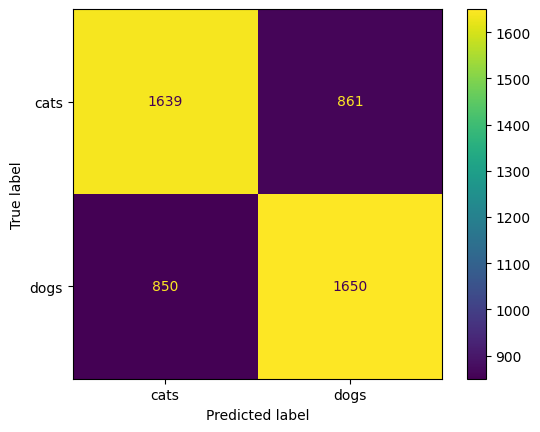

In [20]:
# plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cats", "dogs"])
cm_display.plot()
plt.show()

In [21]:
shutil.unpack_archive("/content/drive/MyDrive/test1.zip")

In [22]:
test_images_list = sorted(os.listdir("test1"))
print(f"the test dataset has {len(test_images_list)} images")

the test dataset has 12500 images


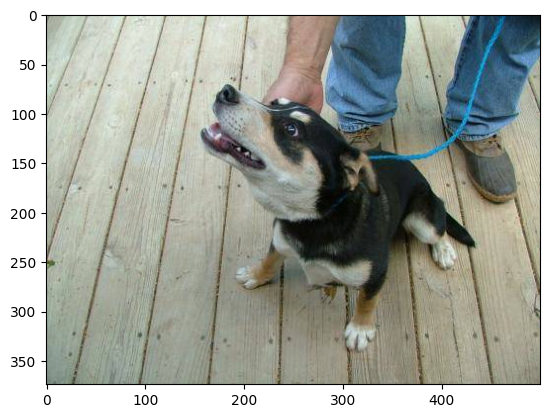

cat = 22.59620994805341%
dog = 77.4037900519466%
The predicted image is dog


In [23]:
test_img = io.imread(os.path.join("test1", test_images_list[9000]))

plt.imshow(test_img)
plt.show()

gray_test_img = color.rgb2gray(test_img)
resized_test_img = transform.resize(gray_test_img, (50, 50))
normalized_test_img = resized_test_img / 255.0
flat_test_img = normalized_test_img.flatten()

principal_test_img = pca.transform([flat_test_img])

probability = model.predict_proba(principal_test_img)[0]

print(f'cat = {probability[0]*100}%')
print(f'dog = {probability[1]*100}%')

if model.predict(principal_test_img)[0] == 0:
  print("The predicted image is cat")
else:
  print("The predicted image is dog")

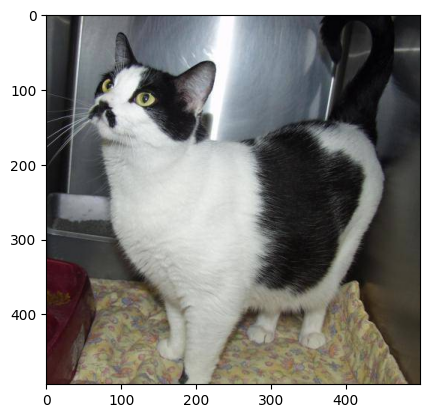

cat = 85.69214614723037%
dog = 14.307853852769636%
The predicted image is cat


In [24]:
test_img = io.imread(os.path.join("test1", test_images_list[1200]))

plt.imshow(test_img)
plt.show()

gray_test_img = color.rgb2gray(test_img)
resized_test_img = transform.resize(gray_test_img, (50, 50))
normalized_test_img = resized_test_img / 255.0
flat_test_img = normalized_test_img.flatten()

principal_test_img = pca.transform([flat_test_img])

probability = model.predict_proba(principal_test_img)[0]

print(f'cat = {probability[0]*100}%')
print(f'dog = {probability[1]*100}%')

if model.predict(principal_test_img)[0] == 0:
  print("The predicted image is cat")
else:
  print("The predicted image is dog")